In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

path = "../../Data/"

def plot_series(time, series, label, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("#Sunplots")
    plt.grid(True)

# Import Data

In [2]:
df = pd.read_csv(path + "hlsp_deep47tuc_hst_acs_47tuc_f606w-f814w_v1_catalog.txt", sep='\s+')

Text(0.5, 1.0, 'Correlation between different fearures')

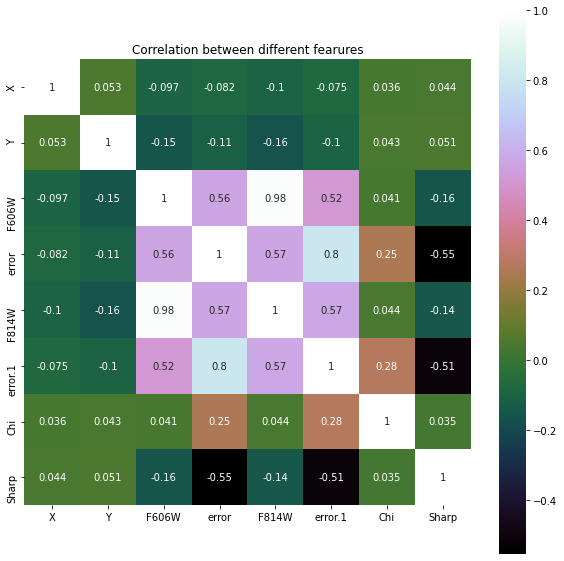

In [3]:
import seaborn as sns

correlation = df[df.columns[1:]].corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')

In [4]:
from sklearn.preprocessing import MinMaxScaler

X_std = MinMaxScaler().fit_transform(df[df.columns[1:]])
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_vals/eig_vals.sum()

array([0.39695717, 0.24214213, 0.22504599, 0.09502065, 0.02118135,
       0.01168484, 0.00175219, 0.00621568])

In [5]:
df[df.columns[1:]].T

,0,1,2,3,4,5,6,7,8,9,...,51470,51471,51472,51473,51474,51475,51476,51477,51478,51479
X,4462.9470,5002.4860,5003.5740,4448.4930,5040.7170,4559.9330,4384.7950,4402.9280,5043.7150,4953.1690,...,5309.2650,3532.3390,5666.0210,7059.1260,4945.8700,3417.4670,3435.0310,3594.5670,5155.0930,5658.6040
Y,140.8590,186.1380,195.4210,207.4170,224.3660,244.2790,247.0930,271.7920,272.6090,280.2860,...,10390.2710,10391.6400,10392.4900,10393.4200,10393.9200,10394.3190,10396.7300,10397.3400,10397.9200,10399.7200
F606W,28.1970,20.8430,27.0140,30.1930,28.9350,24.7130,28.3990,28.8150,20.4110,22.9870,...,20.3790,29.4270,28.8380,23.4210,26.0780,26.8950,23.1520,27.2090,28.2350,24.8980
error,0.1036,0.0552,0.2194,0.3641,0.1669,0.0574,0.1016,0.1858,0.0585,0.0532,...,0.0435,0.1816,0.1317,0.0634,0.2676,0.0783,0.0504,0.0815,0.0984,0.0349
F814W,27.1270,19.8150,26.0680,28.2700,28.9410,24.1850,27.4300,28.0730,19.5390,22.4850,...,19.4570,28.1010,28.5430,23.1800,24.0390,25.6020,22.6620,27.1300,26.4770,24.1980
error.1,0.1068,0.0661,0.1349,0.1636,0.2464,0.0687,0.1490,0.1702,0.0550,0.0635,...,0.0530,0.2309,0.2226,0.0786,0.1971,0.1050,0.0505,0.0900,0.0937,0.0752
Chi,6.1060,10.6900,10.6510,4.0590,4.2740,10.2280,5.9905,5.2020,10.1610,10.1570,...,8.4000,4.8450,3.0340,10.3280,30.5300,9.5080,8.8230,4.3110,6.1730,8.4770
Sharp,0.7310,0.4000,0.1940,-1.9585,-0.7720,-0.0700,0.8630,-0.5910,0.6110,0.5230,...,0.2770,-0.8530,-0.4510,0.2080,-0.8170,1.3140,-0.1330,0.9355,0.3190,0.7300


In [6]:
df.drop(columns=['X', 'Y', 'ID'], inplace=True)

x = df.F606W - df.F814W
y = 16.5 + 4. * x

df.loc[df.F814W >= y, 'Groups'] = 1
df.loc[df.F814W < y, 'Groups'] = 0
df

,F606W,error,F814W,error.1,Chi,Sharp,Groups
0,28.197,0.1036,27.127,0.1068,6.106,0.7310,1.0
1,20.843,0.0552,19.815,0.0661,10.690,0.4000,0.0
2,27.014,0.2194,26.068,0.1349,10.651,0.1940,1.0
3,30.193,0.3641,28.270,0.1636,4.059,-1.9585,1.0
4,28.935,0.1669,28.941,0.2464,4.274,-0.7720,1.0
...,...,...,...,...,...,...,...
51475,26.895,0.0783,25.602,0.1050,9.508,1.3140,1.0
51476,23.152,0.0504,22.662,0.0505,8.823,-0.1330,1.0
51477,27.209,0.0815,27.130,0.0900,4.311,0.9355,1.0
51478,28.235,0.0984,26.477,0.0937,6.173,0.3190,1.0


## Manipulating Data

In [7]:
X = df[df.columns[:-1]].to_numpy()
y = df[df.columns[-1]].to_numpy()

In [8]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(y, num_classes=2)
#y = labels.reshape(-1, 3)
y.shape

(51480, 2)

## Standardizing Data

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit(X).transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

# Neural Network

## Creating Neural Network

In [51]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(len(df.columns[:-1]), input_dim=len(df.columns[:-1]), activation='relu'),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(2, activation="softmax"),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 42        
                                                                 
 dense_1 (Dense)             (None, 32)                224       
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 1,388
Trainable params: 1,388
Non-trainable params: 0
_________________________________________________________________


## Compiling Model and Fitting to Data

In [52]:
optimizer = tf.keras.optimizers.Adam(learning_rate=5E-4)
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])


# metrics=['mae']
# metrics=[tf.keras.metrics.RootMeanSquaredError()]

In [53]:
stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4, mode='auto')
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=stopping, 
                    batch_size=5000)

Epoch 1/100


c:\Users\cosmi\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


7/7 [==============================] - 0s 20ms/step - loss: 0.6876 - accuracy: 0.5431 - val_loss: 0.6817 - val_accuracy: 0.5428
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6765 - accuracy: 0.5515 - val_loss: 0.6727 - val_accuracy: 0.5428
Epoch 3/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6686 - accuracy: 0.5515 - val_loss: 0.6663 - val_accuracy: 0.5428
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6620 - accuracy: 0.5515 - val_loss: 0.6594 - val_accuracy: 0.5428
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6542 - accuracy: 0.5515 - val_loss: 0.6503 - val_accuracy: 0.5428
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6446 - accuracy: 0.5515 - val_loss: 0.6399 - val_accuracy: 0.5428
Epoch 7/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6338 - accuracy: 0.5516 - val_loss: 0.6278 - val_accuracy: 0.5436
Epoch 8/100
7/7 [=====================

In [46]:
model.evaluate(X_val, y_val, verbose=0)[1]

0.9995144009590149

In [47]:
model.evaluate(X_test, y_test)[1]

322/322 [==============================] - 0s 931us/step - loss: 0.0020 - accuracy: 0.9995


0.9995144009590149

In [48]:
datas = scaler.inverse_transform(X_test)
color = datas[:, 0] - datas[:, 1]

(33.0, 12.5)

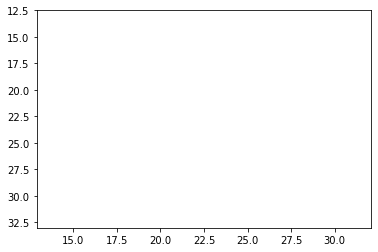

In [49]:
from matplotlib.colors import ListedColormap
plt.scatter(color, datas[:, 1], c=pred, alpha=.3, s=0.1, cmap=ListedColormap(['g', 'b'])) # g = 0, b = 1
plt.ylim(33, 12.5)

(33.0, 12.5)

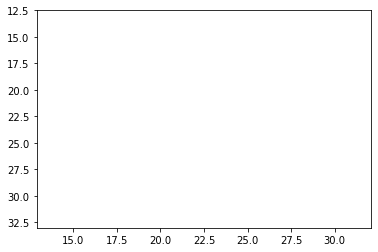

In [50]:
plt.scatter(color, datas[:, 1], c=y_test.argmax(axis=1), alpha=.3, s=0.1, cmap=ListedColormap(['g', 'b']))
plt.ylim(33, 12.5)